#Project Dissertation (CI7000_A_SPAN1_21)

## Implementaion of recommendation system for various datasets

* Netflix Prize Dataset
---


*    Ladan Saeidi - K2145352


# Installing Required Libraries

In [2]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from surprise import SVD, Reader, KNNBasic, KNNBaseline, SlopeOne, NMF, CoClustering, NormalPredictor,KNNWithMeans
from surprise import Dataset
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

# Importing Data

In [4]:
reader = Reader()
url = "https://raw.githubusercontent.com/ladan888/Project-Dissertation-CI7000_A_SPAN1_21-/main/data.csv"
csv = pd.read_csv(url)

# Loading local dataset
data = Dataset.load_from_df(csv[['userId', 'movieId', 'rating']], reader)

# Plotting the Distribution of Ratings

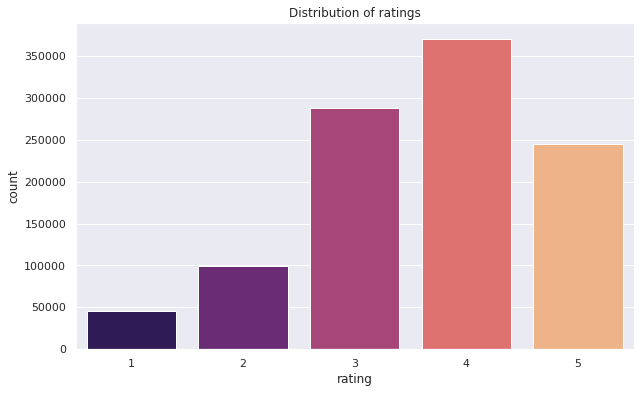

In [5]:
sns.set(rc={'figure.figsize':(10,6)})
ax =sns.countplot(x='rating',data=csv,palette="magma")
ax.set_title('Distribution of ratings');

# Findind Some Information of Data

In [6]:
csv.shape

(1048575, 4)

In [7]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1048575 non-null  int64 
 1   movieId    1048575 non-null  int64 
 2   rating     1048575 non-null  int64 
 3   timestamp  1048575 non-null  object
dtypes: int64(3), object(1)
memory usage: 32.0+ MB


In [8]:
csv.describe()

,userId,movieId,rating
count,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.320279e+02,1.322761e+06,3.637300e+00
std,7.156684e+01,7.646638e+05,1.072758e+00
min,1.000000e+00,6.000000e+00,1.000000e+00
25%,5.700000e+01,6.609370e+05,3.000000e+00
50%,1.520000e+02,1.318946e+06,4.000000e+00
75%,1.910000e+02,1.985225e+06,4.000000e+00
max,2.410000e+02,2.649429e+06,5.000000e+00


In [9]:
df = csv.groupby("rating").agg([np.mean, np.std])
df

userId                  movieId               
              mean        std          mean            std
rating                                                    
1       124.025405  70.317521  1.330102e+06  768988.114320
2       127.671553  68.990974  1.325045e+06  766050.194614
3       128.306168  70.302538  1.322494e+06  763976.070219
4       131.989011  72.150607  1.321538e+06  764899.805985
5       139.745415  72.738027  1.322619e+06  763731.299720

# Implementing Algorithms

## SVD

In [ ]:
# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9782  0.9767  0.9744  0.9762  0.9769  0.9765  0.0012  
MAE (testset)     0.7713  0.7710  0.7682  0.7702  0.7688  0.7699  0.0012  
Fit time          63.85   64.34   61.79   63.68   61.79   63.09   1.08    
Test time         2.55    3.19    2.65    3.17    2.82    2.88    0.26    


{'test_rmse': array([0.97823685, 0.97669349, 0.97444682, 0.97622889, 0.97691913]),
 'test_mae': array([0.77126308, 0.77099791, 0.76819572, 0.77020353, 0.76876625]),
 'fit_time': (63.85258746147156,
  64.3437728881836,
  61.79455065727234,
  63.67540621757507,
  61.78754687309265),
 'test_time': (2.5513198375701904,
  3.1928505897521973,
  2.6458969116210938,
  3.165475845336914,
  2.8219785690307617)}

In [ ]:
# We'll use the famous SVD algorithm.
algo = SVD(n_factors=30, n_epochs=50,biased=True, lr_all=0.005, reg_all=0.4, verbose=False)

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE', 'MSE'], cv=5, verbose=True)

Evaluating RMSE, MAE, MSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9720  0.9701  0.9706  0.9699  0.9711  0.9707  0.0007  
MAE (testset)     0.7731  0.7723  0.7719  0.7713  0.7719  0.7721  0.0006  
MSE (testset)     0.9447  0.9411  0.9420  0.9407  0.9430  0.9423  0.0014  
Fit time          84.88   81.46   86.56   81.84   82.91   83.53   1.93    
Test time         3.22    2.21    2.37    2.46    2.79    2.61    0.36    


{'test_rmse': array([0.9719669 , 0.97011142, 0.97058724, 0.96988066, 0.97105958]),
 'test_mae': array([0.77309234, 0.77225309, 0.77194176, 0.77128297, 0.77188125]),
 'test_mse': array([0.94471965, 0.94111617, 0.94203959, 0.94066849, 0.94295671]),
 'fit_time': (84.88082361221313,
  81.45874905586243,
  86.56310772895813,
  81.84278583526611,
  82.90704488754272),
 'test_time': (3.2162246704101562,
  2.2077951431274414,
  2.374946355819702,
  2.463862180709839,
  2.78834867477417)}

## KNNBasic(Item-base, Pearson Method)

In [ ]:
similarity_options = {
    'name': 'pearson',
    'user_based': 'False'
}

In [ ]:
# We'll use the famous KNNBasic algorithm.
algo = KNNBasic(sim_options = similarity_options)

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1275  1.1289  1.1290  1.1284  1.1283  1.1284  0.0005  
MAE (testset)     0.8715  0.8727  0.8723  0.8725  0.8716  0.8721  0.0005  
Fit time          0.60    1.13    1.60    1.34    1.40    1.22    0.34    
Test time         5.51    5.06    4.68    5.20    5.61    5.22    0.33    


{'test_rmse': array([1.127477  , 1.12889305, 1.12895218, 1.12839766, 1.12828343]),
 'test_mae': array([0.87149644, 0.87265227, 0.87231779, 0.87245925, 0.87162546]),
 'fit_time': (0.603569746017456,
  1.134293794631958,
  1.6033051013946533,
  1.3408236503601074,
  1.3980200290679932),
 'test_time': (5.513685703277588,
  5.060192823410034,
  4.683887720108032,
  5.204099178314209,
  5.614598035812378)}

## KNNBasic(User-base, Pearson Method)

In [ ]:
similarity_options1 = {
    'name': 'pearson',
    'user_based': 'True'
}

In [ ]:
# We'll use the famous KNNBasic algorithm.
algo = KNNBasic(sim_options = similarity_options1)

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1263  1.1257  1.1277  1.1316  1.1305  1.1283  0.0023  
MAE (testset)     0.8707  0.8692  0.8723  0.8750  0.8736  0.8721  0.0021  
Fit time          0.92    1.32    1.36    1.18    1.06    1.17    0.16    
Test time         5.80    5.48    5.66    5.11    4.91    5.39    0.33    


{'test_rmse': array([1.12628628, 1.12565539, 1.12768328, 1.13160912, 1.13048095]),
 'test_mae': array([0.8706812 , 0.86916688, 0.87227773, 0.87496299, 0.8736003 ]),
 'fit_time': (0.9231436252593994,
  1.3201582431793213,
  1.3610286712646484,
  1.1804285049438477,
  1.060772180557251),
 'test_time': (5.795338869094849,
  5.4847283363342285,
  5.6590986251831055,
  5.110018014907837,
  4.912279844284058)}

## NMF

In [ ]:
# We'll use the famous NMF algorithm.
algo = NMF()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1344  1.1475  1.1411  1.1370  1.1405  1.1401  0.0044  
MAE (testset)     0.8965  0.9105  0.9028  0.8990  0.9028  0.9023  0.0047  
Fit time          101.42  103.07  112.87  105.43  108.97  106.35  4.13    
Test time         2.88    2.26    3.03    2.32    2.43    2.58    0.31    


{'test_rmse': array([1.13443264, 1.14749845, 1.14107074, 1.13701329, 1.14047144]),
 'test_mae': array([0.89646585, 0.91045721, 0.90278022, 0.89904466, 0.90277534]),
 'fit_time': (101.42179870605469,
  103.07041144371033,
  112.87150645256042,
  105.42519307136536,
  108.97214889526367),
 'test_time': (2.882232666015625,
  2.255974054336548,
  3.0323338508605957,
  2.3193185329437256,
  2.429300308227539)}

## KNNBaseline

In [ ]:
# We'll use the famous KNNBaseline algorithm.
algo = KNNBaseline()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0382  1.0399  1.0397  1.0387  1.0391  1.0391  0.0006  
MAE (testset)     0.8017  0.8024  0.8034  0.8014  0.8022  0.8022  0.0007  
Fit time          7.72    9.15    9.95    7.73    9.07    8.72    0.87    
Test time         5.60    5.79    5.24    5.78    5.78    5.64    0.21    


{'test_rmse': array([1.03824678, 1.03988194, 1.03967546, 1.03869591, 1.03911106]),
 'test_mae': array([0.80169807, 0.80243293, 0.80341934, 0.80135613, 0.80219054]),
 'fit_time': (7.718586206436157,
  9.153273582458496,
  9.952341794967651,
  7.725431442260742,
  9.067854642868042),
 'test_time': (5.597066402435303,
  5.791610479354858,
  5.2435243129730225,
  5.778926134109497,
  5.784914493560791)}

## CoClustering

In [ ]:
# We'll use the famous CoClustering algorithm.
algo = CoClustering()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm CoClustering on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0889  1.0912  1.0861  1.0916  1.0864  1.0889  0.0023  
MAE (testset)     0.8472  0.8491  0.8449  0.8503  0.8452  0.8473  0.0021  
Fit time          63.19   64.14   66.32   62.81   64.83   64.26   1.25    
Test time         2.54    1.78    2.39    2.06    2.17    2.19    0.26    


{'test_rmse': array([1.08889518, 1.09118553, 1.0861398 , 1.09164714, 1.08644895]),
 'test_mae': array([0.84718578, 0.84912882, 0.84486905, 0.8502533 , 0.84515654]),
 'fit_time': (63.19024181365967,
  64.14440584182739,
  66.31590676307678,
  62.8104293346405,
  64.83005714416504),
 'test_time': (2.5398142337799072,
  1.7766406536102295,
  2.388930320739746,
  2.056973695755005,
  2.1665656566619873)}

## NormalPredictor

In [ ]:
# We'll use the famous NormalPredictor algorithm.
algo = NormalPredictor()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.4503  1.4461  1.4461  1.4451  1.4493  1.4474  0.0020  
MAE (testset)     1.1609  1.1584  1.1566  1.1565  1.1598  1.1584  0.0017  
Fit time          1.48    2.60    2.27    2.59    2.40    2.27    0.41    
Test time         2.40    2.78    2.23    2.41    2.50    2.46    0.18    


{'test_rmse': array([1.45025591, 1.44609744, 1.44609342, 1.44512455, 1.44933914]),
 'test_mae': array([1.16092372, 1.15840837, 1.15659802, 1.15647639, 1.15976024]),
 'fit_time': (1.4775841236114502,
  2.6025307178497314,
  2.272897481918335,
  2.5872867107391357,
  2.4017348289489746),
 'test_time': (2.3960535526275635,
  2.7793898582458496,
  2.231266736984253,
  2.405352830886841,
  2.4970057010650635)}

## KNNBaseline

In [ ]:
# We'll use the famous KNNBaseline algorithm.
algo = KNNBaseline(sim_options={'name': 'msd','user_based': 'True'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [ ]:
# We'll use the famous KNNBaseline algorithm.
algo = KNNBaseline(sim_options={'name': 'msd','user_based': 'False'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [ ]:
# We'll use the famous KNNBaseline algorithm.
algo = KNNBaseline(sim_options={'name': 'Pearson','user_based': 'True'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [ ]:
# We'll use the famous KNNBaseline algorithm.
algo = KNNBaseline(sim_options={'name': 'Pearson','user_based': 'False'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

## KNNBaseline(Item-base, msd Method)

In [ ]:
# We'll use the famous KNNBasic algorithm.
algo = KNNBasic(sim_options = {'name': 'msd','user_based': 'False'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

## KNNBaseline(User-base, msd Method)

In [ ]:
# We'll use the famous KNNBasic algorithm.
algo = KNNBasic(sim_options = {'name': 'msd','user_based': 'True'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

## KNNWithMeans

In [ ]:
# We'll use the famous KNNWithMeans algorithm.
algo = KNNWithMeans(sim_options={'name': 'pearson','user_based': 'True'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [ ]:
# We'll use the famous KNNWithMeans algorithm.
algo = KNNWithMeans(sim_options={'name': 'pearson','user_based': 'True'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [ ]:
# We'll use the famous KNNWithMeans algorithm.
algo = KNNWithMeans(sim_options={'name': 'pearson','user_based': 'True'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [ ]:
# We'll use the famous KNNWithMeans algorithm.
algo = KNNWithMeans(sim_options={'name': 'pearson','user_based': 'True'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Plotting RMSE

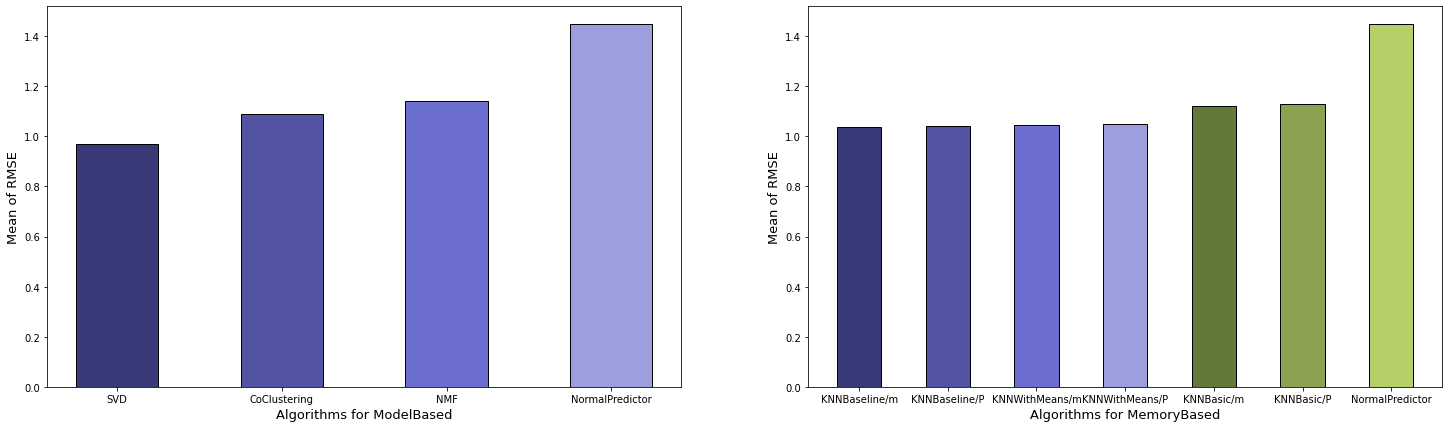

In [ ]:
algs1 = ['SVD', 'CoClustering', 'NMF', 'NormalPredictor']
meanOfrmse1 = [0.9707,1.0889,1.1401,1.4474]
# create Pandas dataframe from two lists
df1 = pd.DataFrame({"Algorithms":algs1,
                  "RMSE":meanOfrmse1})


algs2 = ['KNNBasic/P', 'KNNBasic/m', 'KNNBaseline/P', 'KNNBaseline/m', 'KNNWithMeans/P', 'KNNWithMeans/m', 'NormalPredictor']
meanOfrmse2 = [1.1283,1.1219, 1.0415, 1.0393, 1.0492, 1.0471, 1.4474]
# create Pandas dataframe from two lists
df2 = pd.DataFrame({"Algorithms":algs2,
                  "RMSE":meanOfrmse2})

	
df1_sorted= df1.sort_values('RMSE')
df2_sorted= df2.sort_values('RMSE')


plt.figure(figsize=(25,7))
col_map = plt.get_cmap('tab20b')



plt.subplot(121)
plt.bar('Algorithms', 'RMSE', data=df1_sorted,  width=0.5,color=col_map.colors, edgecolor='k')  
# df1_sorted['RMSE'].plot(kind='line', marker='o', color='black', ms=10)
plt.xlabel('Algorithms for ModelBased', fontsize=13)
plt.ylabel('Mean of RMSE', fontsize=13)
plt.subplot(122)
plt.bar('Algorithms', 'RMSE',  data=df2_sorted ,color=col_map.colors, edgecolor='k', width=0.5)
# df2_sorted['RMSE'].plot(kind='line', marker='o', color='black', ms=10)
plt.xlabel('Algorithms for MemoryBased', fontsize=13)
plt.ylabel('Mean of RMSE', fontsize=13)
plt.show()


# Plotting MAE

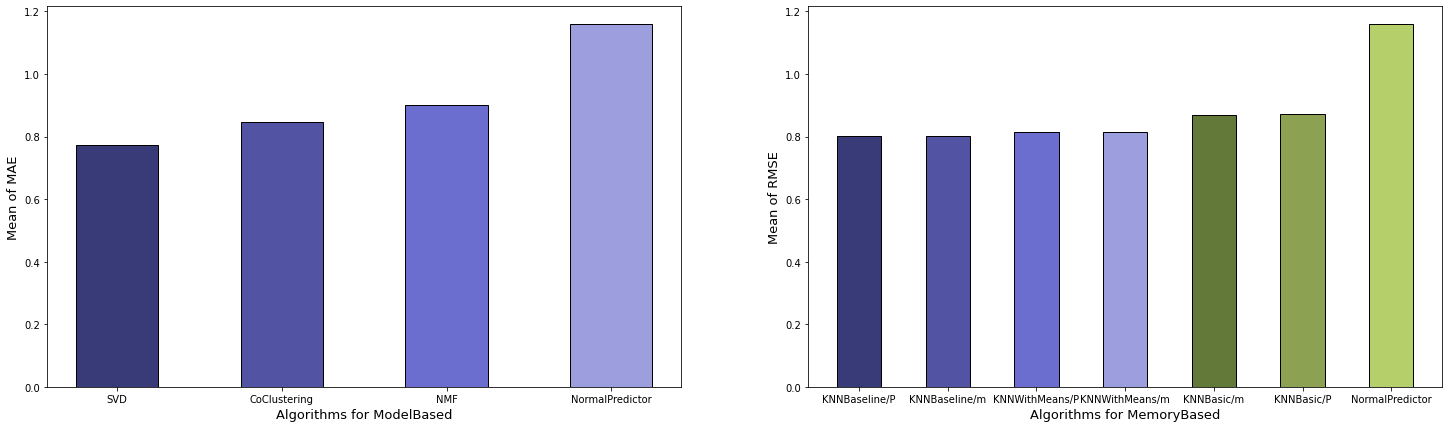

In [ ]:
algs1 = ['SVD', 'CoClustering', 'NMF', 'NormalPredictor']
meanOfmae1 = [0.7721,0.8473,0.9023,1.1584]
# create Pandas dataframe from two lists
df1 = pd.DataFrame({"Algorithms":algs1,
                  "MAE":meanOfmae1})


algs2 = ['KNNBasic/P', 'KNNBasic/m', 'KNNBaseline/P', 'KNNBaseline/m', 'KNNWithMeans/P', 'KNNWithMeans/m', 'NormalPredictor']
meanOfmae2 = [0.8721,0.8696, 0.8013, 0.8023, 0.8130, 0.8143, 1.1584]
# create Pandas dataframe from two lists
df2 = pd.DataFrame({"Algorithms":algs2,
                  "MAE":meanOfmae2})

	
df1_sorted= df1.sort_values('MAE')
df2_sorted= df2.sort_values('MAE')


plt.figure(figsize=(25,7))
col_map = plt.get_cmap('tab20b')



plt.subplot(121)
plt.bar('Algorithms', 'MAE', data=df1_sorted,  width=0.5,color=col_map.colors, edgecolor='k')  
# df1_sorted['MAE'].plot(kind='line', marker='o', color='black', ms=10)
plt.xlabel('Algorithms for ModelBased', fontsize=13)
plt.ylabel('Mean of MAE', fontsize=13)
plt.subplot(122)
plt.bar('Algorithms', 'MAE',  data=df2_sorted ,color=col_map.colors, edgecolor='k', width=0.5)
# df2_sorted['MAE'].plot(kind='line', marker='o', color='black', ms=10)
plt.xlabel('Algorithms for MemoryBased', fontsize=13)
plt.ylabel('Mean of RMSE', fontsize=13)
plt.show()


# Plotting RMSE and MAE on Multiple Bar Chart

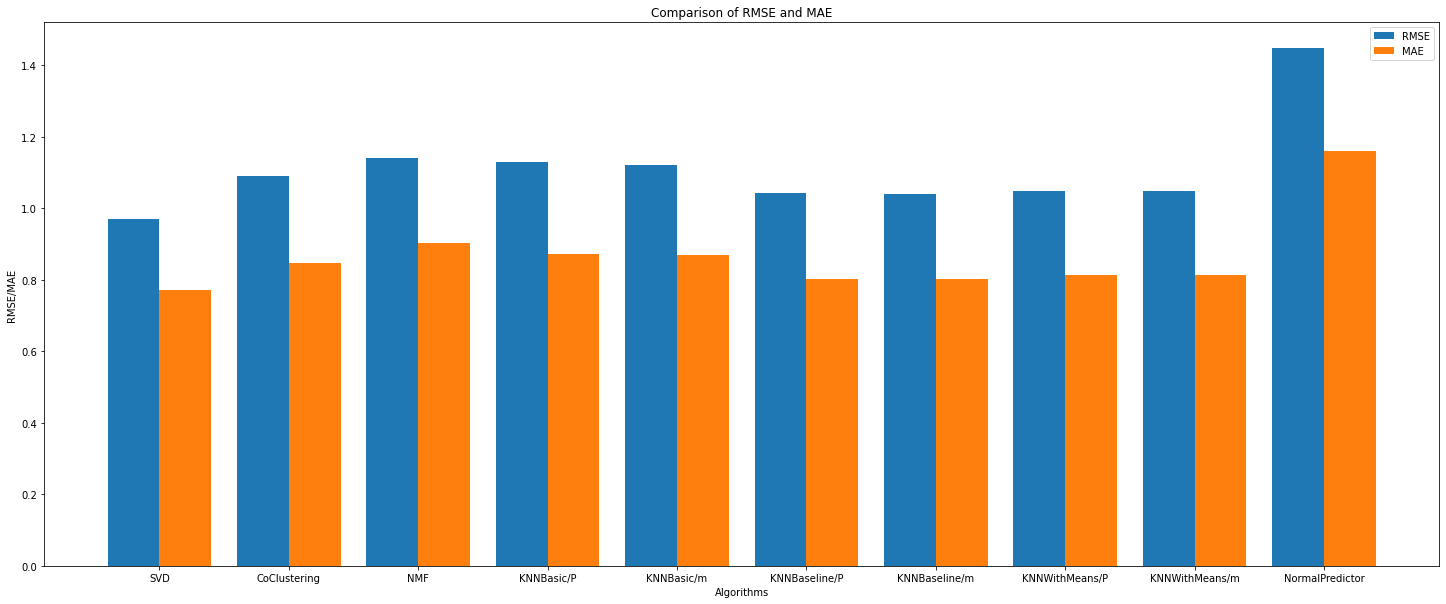

In [ ]:
X = ['SVD', 'CoClustering', 'NMF','KNNBasic/P', 'KNNBasic/m', 'KNNBaseline/P', 'KNNBaseline/m', 'KNNWithMeans/P', 'KNNWithMeans/m', 'NormalPredictor']
rmse = [0.9707,1.0889,1.1401, 1.1283,1.1219, 1.0415, 1.0393, 1.0492, 1.0471,1.4474	]
mae = [0.7721,0.8473,0.9023,0.8721,0.8696, 0.8013, 0.8023, 0.8130, 0.8143 ,1.1584]
plt.figure(figsize=[25, 10])
X_axis = np.arange(len(X))

# df1 = pd.DataFrame({"Algorithms":X,
#                   "RMSE":rmse})
# df2 = pd.DataFrame({"Algorithms":X,
#                   "MAE":mae})

# df1_sorted= df1.sort_values('RMSE')
# df2_sorted= df2.sort_values('MAE')

plt.bar(X_axis - 0.2, rmse, 0.4, label = 'RMSE')
plt.bar(X_axis + 0.2, mae, 0.4, label = 'MAE')

# plt.bar(np.arange(len(rmse)), rmse, width=0.4, data=df1_sorted)
# plt.bar(np.arange(len(mae))+ 0.4, mae, width=0.4, data=df2_sorted)


plt.xticks(X_axis, X)
plt.xlabel("Algorithms",fontsize=10)
plt.ylabel("RMSE/MAE",fontsize=10)
plt.title("Comparison of RMSE and MAE")
plt.legend()
plt.show()

# Plotting Fit_time VS Test_Time

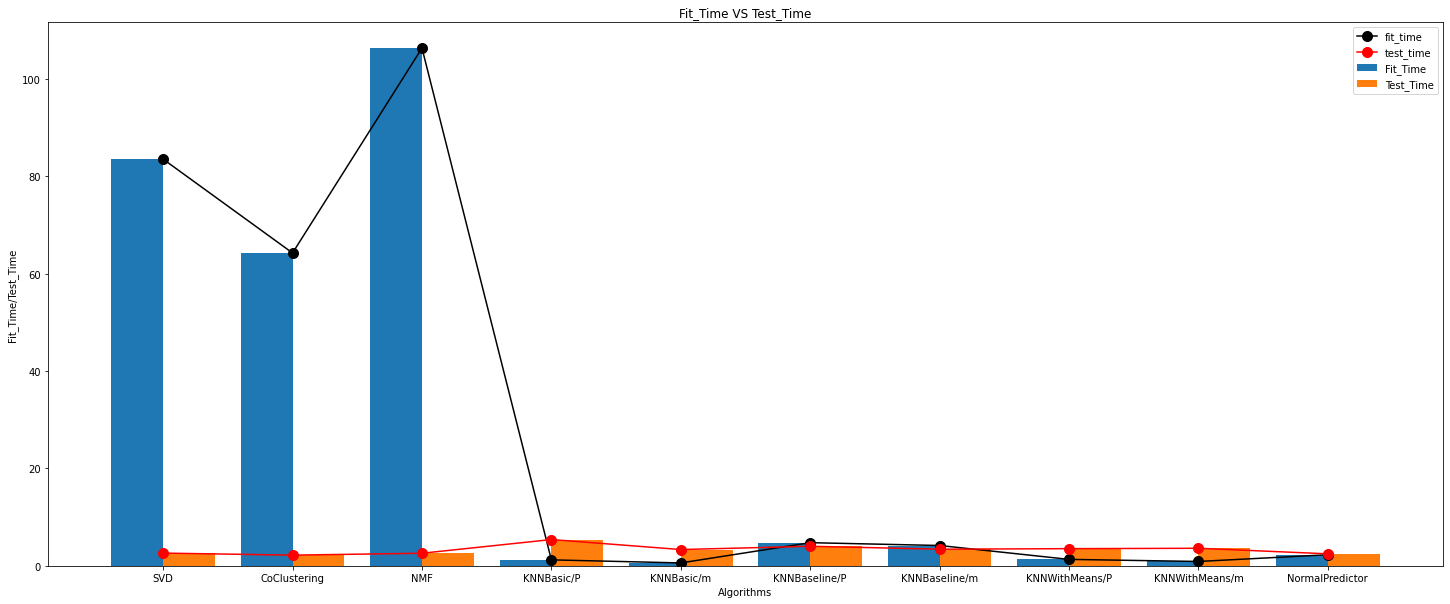

In [ ]:
X = ['SVD', 'CoClustering', 'NMF','KNNBasic/P', 'KNNBasic/m', 'KNNBaseline/P', 'KNNBaseline/m', 'KNNWithMeans/P', 'KNNWithMeans/m', 'NormalPredictor']
fit_time = [83.53,64.26,106.35,1.22,0.59,4.75,4.17,1.32,0.89,2.27 	]
test_time = [2.61,2.19,2.58,5.39,3.34,4.01,3.41,3.52,3.60,2.46]
plt.figure(figsize=[25, 10])
X_axis = np.arange(len(X))

df1 = pd.DataFrame({"Algorithms":X,
                  "fit_time":fit_time})
df2 = pd.DataFrame({"Algorithms":X,
                  "test_time":test_time})

# df1_sorted= df1.sort_values('RMSE')
# df2_sorted= df2.sort_values('MAE')

plt.bar(X_axis - 0.2, fit_time, 0.4, label = 'Fit_Time')
plt.bar(X_axis + 0.2, test_time, 0.4, label = 'Test_Time')
df1['fit_time'].plot(kind='line', marker='o', color='black', ms=10)
df2['test_time'].plot(kind='line', marker='o', color='red', ms=10)
# plt.bar(np.arange(len(rmse)), rmse, width=0.4, data=df1_sorted)
# plt.bar(np.arange(len(mae))+ 0.4, mae, width=0.4, data=df2_sorted)


plt.xticks(X_axis, X)
plt.xlabel("Algorithms",fontsize=10)
plt.ylabel("Fit_Time/Test_Time",fontsize=10)
plt.title("Fit_Time VS Test_Time")
plt.legend()
plt.show()

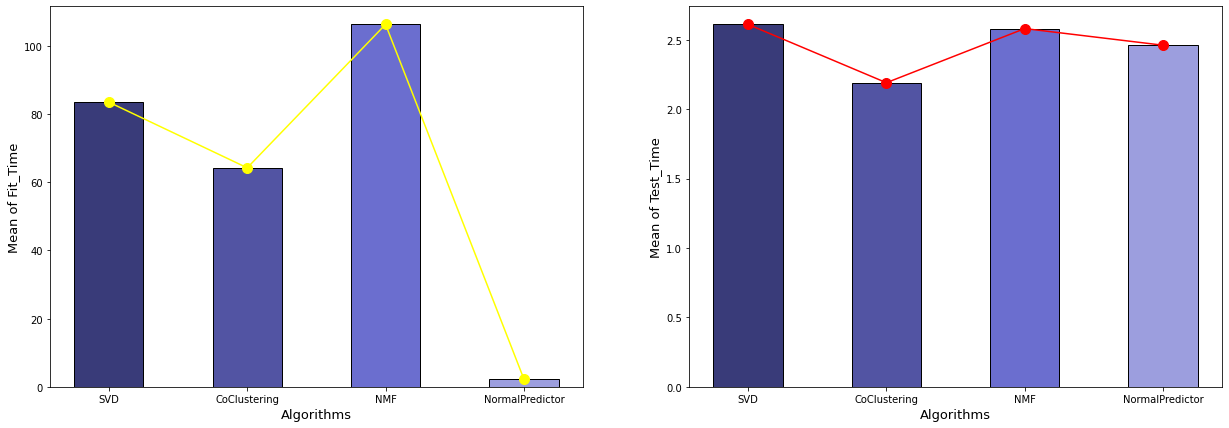

In [ ]:
algs1 = ['SVD', 'CoClustering', 'NMF', 'NormalPredictor']
fit_time = [83.53,64.26,106.35, 2.27]
# create Pandas dataframe from two lists
df1 = pd.DataFrame({"Algorithms":algs1,
                  "fit_time":fit_time})


algs2 = ['SVD', 'CoClustering',  'NMF', 'NormalPredictor']
test_time = [2.61,2.19,2.58, 2.46]
# create Pandas dataframe from two lists
df2 = pd.DataFrame({"Algorithms":algs2,
                  "test_time":test_time})

	
# df1_sorted= df1.sort_values('MAE')
# df2_sorted= df2.sort_values('MAE')


plt.figure(figsize=(21,7))
col_map = plt.get_cmap('tab20b')



plt.subplot(121)
plt.bar('Algorithms', 'fit_time', data=df1,  width=0.5,color=col_map.colors, edgecolor='k')  
df1['fit_time'].plot(kind='line', marker='o', color='yellow', ms=10)
plt.xlabel('Algorithms', fontsize=13)
plt.ylabel('Mean of Fit_Time', fontsize=13)
plt.subplot(122)
plt.bar('Algorithms', 'test_time',  data=df2 ,color=col_map.colors, edgecolor='k', width=0.5)
df2['test_time'].plot(kind='line', marker='o', color='red', ms=10)
plt.xlabel('Algorithms', fontsize=13)
plt.ylabel('Mean of Test_Time', fontsize=13)
plt.show()


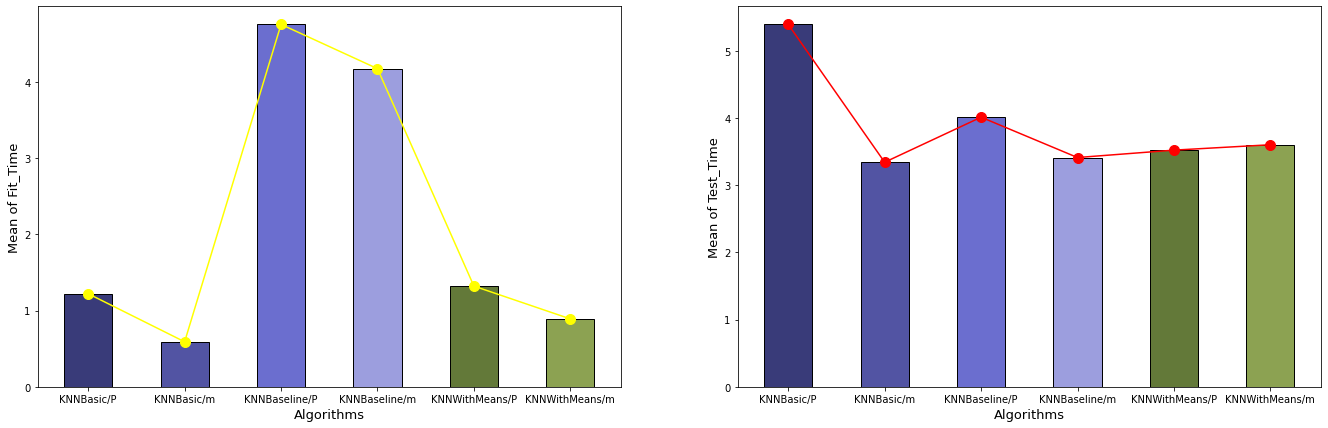

In [ ]:
algs1 = ['KNNBasic/P', 'KNNBasic/m', 'KNNBaseline/P', 'KNNBaseline/m', 'KNNWithMeans/P', 'KNNWithMeans/m']
fit_time = [1.22,0.59,4.75,4.17,1.32,0.89]
# create Pandas dataframe from two lists
df1 = pd.DataFrame({"Algorithms":algs1,
                  "fit_time":fit_time})


algs2 = ['KNNBasic/P', 'KNNBasic/m', 'KNNBaseline/P', 'KNNBaseline/m', 'KNNWithMeans/P', 'KNNWithMeans/m']
test_time = [5.39,3.34,4.01,3.41,3.52,3.60]
# create Pandas dataframe from two lists
df2 = pd.DataFrame({"Algorithms":algs2,
                  "test_time":test_time})

	
# df1_sorted= df1.sort_values('MAE')
# df2_sorted= df2.sort_values('MAE')


plt.figure(figsize=(23,7))
col_map = plt.get_cmap('tab20b')



plt.subplot(121)
plt.bar('Algorithms', 'fit_time', data=df1,  width=0.5,color=col_map.colors, edgecolor='k')  
df1['fit_time'].plot(kind='line', marker='o', color='yellow', ms=10)
plt.xlabel('Algorithms', fontsize=13)
plt.ylabel('Mean of Fit_Time', fontsize=13)
plt.subplot(122)
plt.bar('Algorithms', 'test_time',  data=df2 ,color=col_map.colors, edgecolor='k', width=0.5)
df2['test_time'].plot(kind='line', marker='o', color='red', ms=10)
plt.xlabel('Algorithms', fontsize=13)
plt.ylabel('Mean of Test_Time', fontsize=13)
plt.show()


# References
* The above code adopted from this link, and used in this implementation by making some changes. All figures' codes and results are written from scratch.

http://surpriselib.com/

https://towardsdatascience.com/building-and-testing-recommender-systems-with-surprise-step-by-step-d4ba702ef80b